In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

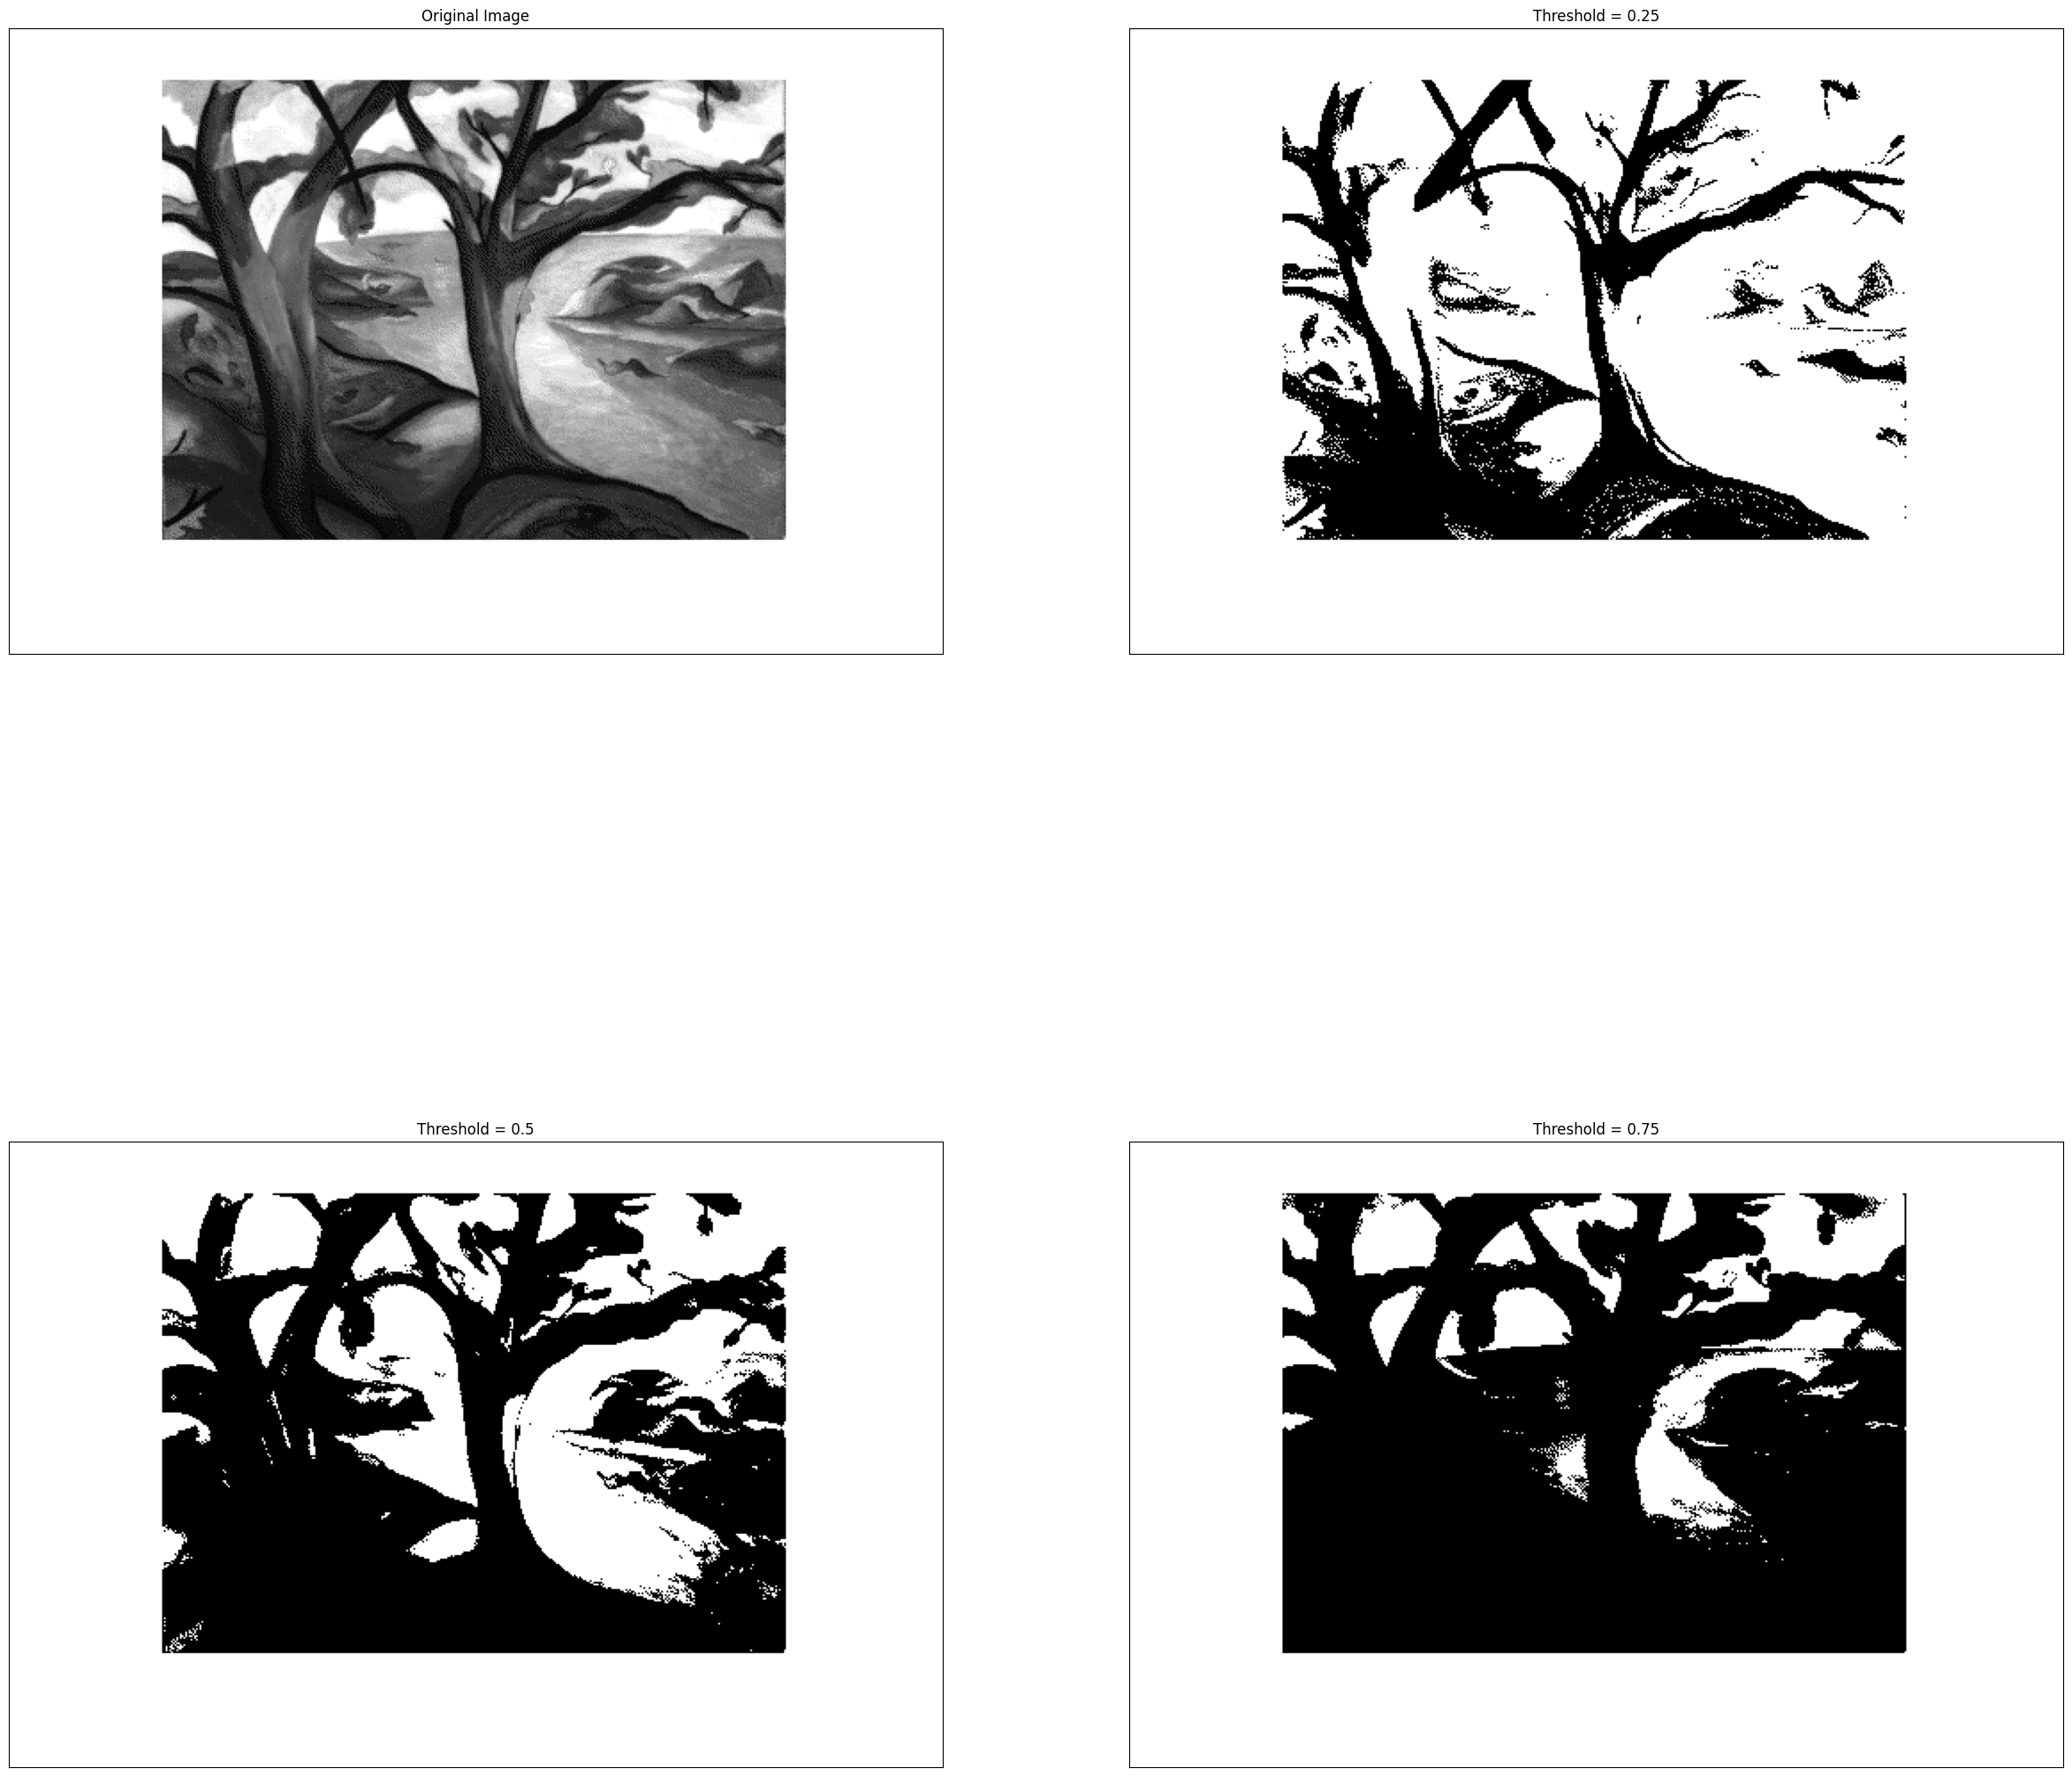

In [16]:
def BWThreshold(im, thresh=0.5):
    limit = int(thresh * 255)
    ret, thresh = cv2.threshold(im, limit, 255, cv2.THRESH_BINARY)
    return thresh

imBGR = cv2.imread('images/trees.png')
imrgb = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)

img1 = BWThreshold(imgray, thresh=0.25)
img2 = BWThreshold(imgray, thresh=0.5)
img3 = BWThreshold(imgray, thresh=0.75)

images = [imgray, img1, img2, img3]
titles = ['Original Image', 'Threshold = 0.25', 'Threshold = 0.5', 'Threshold = 0.75']
plt.figure(figsize=(30,30)) 
for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

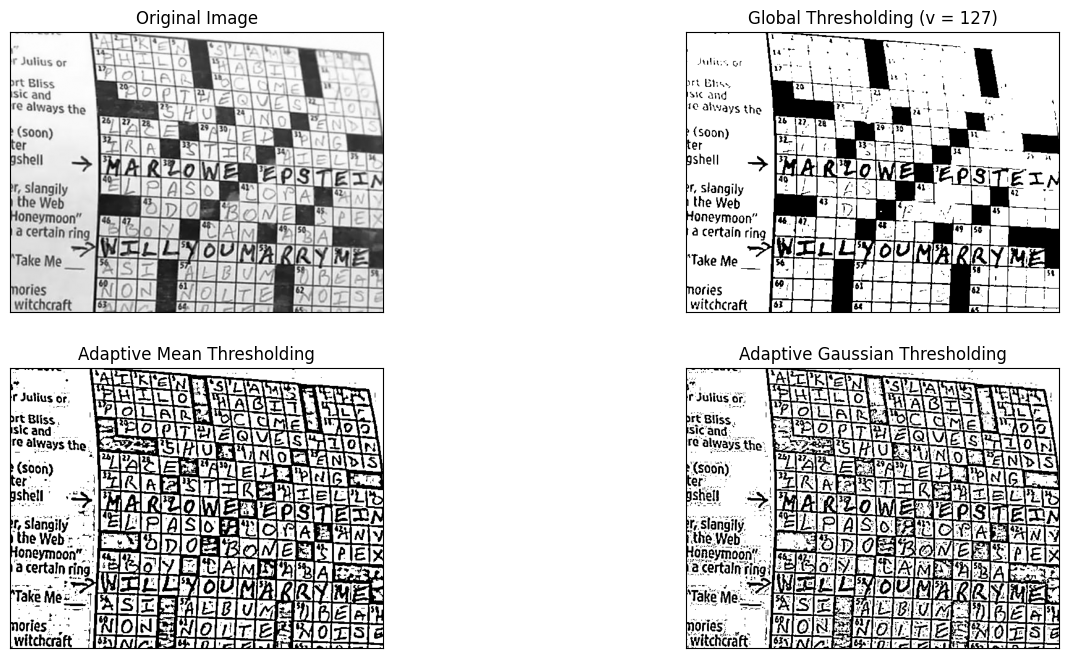

In [17]:
# ADAPTIVE THRESHOLDING

img = cv2.imread('images/creative-proposal.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('images/rocket.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# img = cv2.medianBlur(img,5)

# ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th1 = BWThreshold(img, thresh=0.5)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

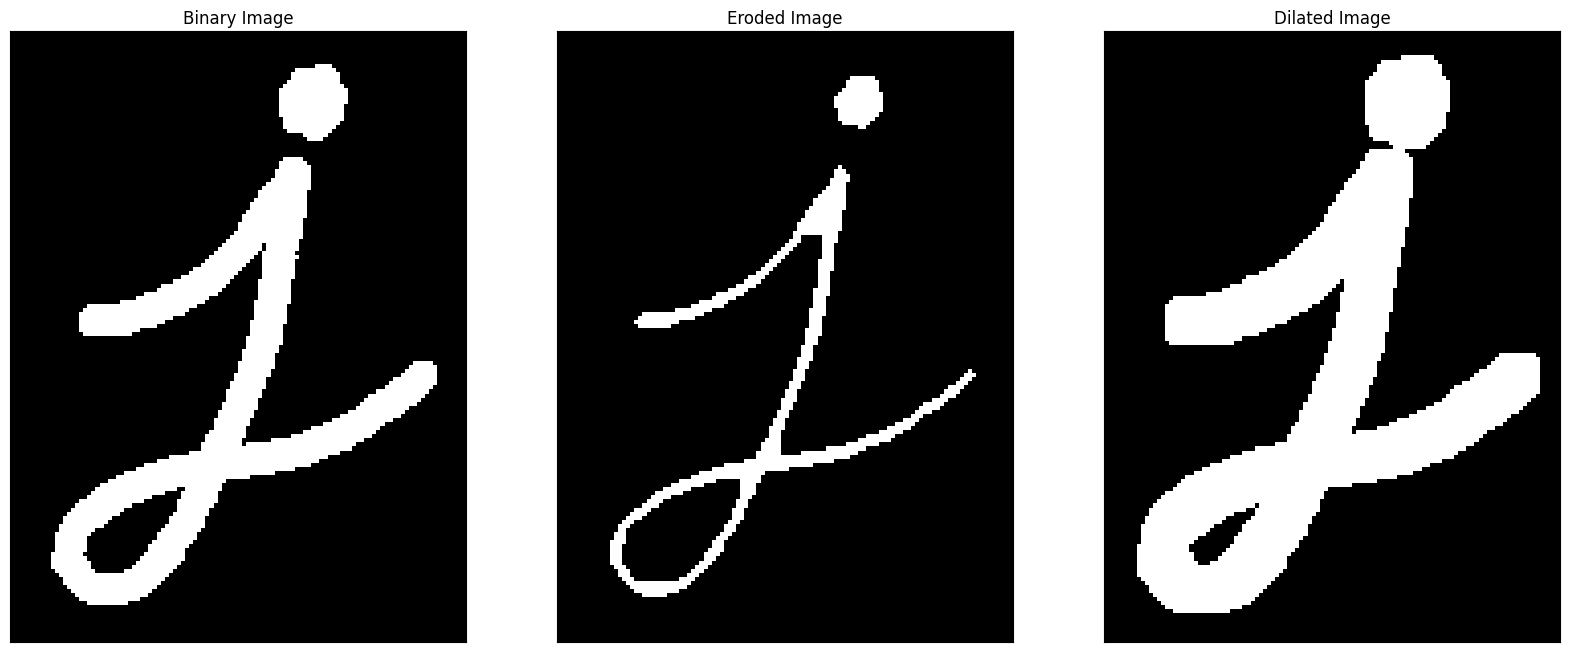

In [18]:
imBGR = cv2.imread('images/j.png')
imrgb = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imBW = BWThreshold(imgray, thresh=0.5)

kernel = np.ones((5,5),np.uint8)
imEroded = cv2.erode(imBW,kernel,iterations = 1)
imDilated = cv2.dilate(imBW,kernel,iterations = 1)

images = [imBW, imEroded, imDilated]
titles = ['Binary Image', 'Eroded Image', 'Dilated Image']
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

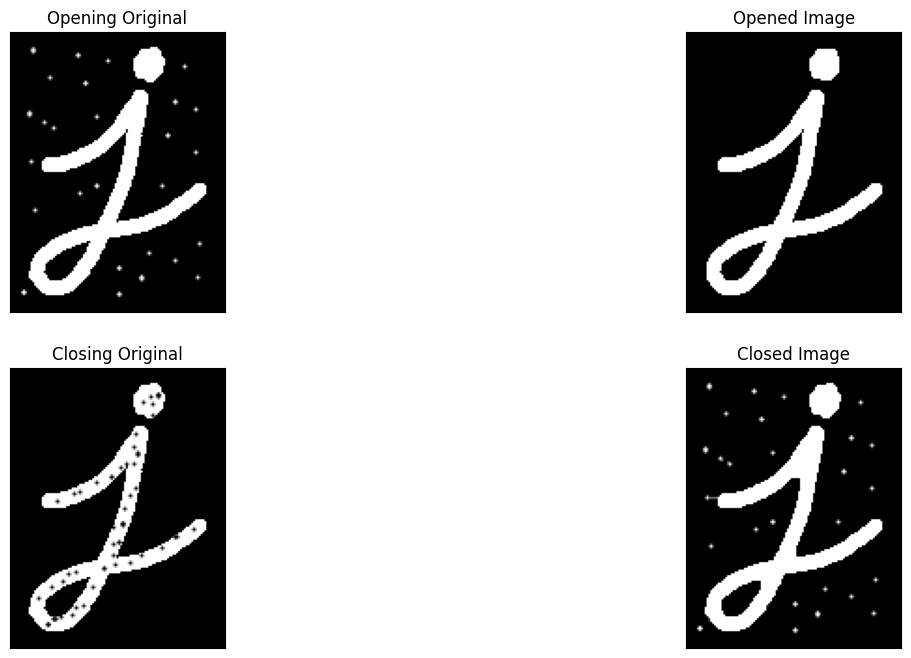

In [20]:
opening_original = cv2.imread('images/opening_original.png')
kernel = np.ones((5, 5), np.uint8)
openedIMG = cv2.morphologyEx(imBGR, cv2.MORPH_OPEN, kernel)

closing_original = cv2.imread('images/closing_original.png')
kernel = np.ones((5, 5), np.uint8)
closedIMG = cv2.morphologyEx(imBGR, cv2.MORPH_CLOSE, kernel)

images = [opening_original, openedIMG, closing_original, closedIMG]
titles = ['Opening Original', 'Opened Image', 'Closing Original', 'Closed Image']
plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()